Goal is to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 
The data from  Gapminder has been consolidated into one CSV file as 'gapminder.csv'

### 1. To begin, we will fit a linear regression with just one feature: 'fertility'

The 'fertility' column represents the average number of children a woman in a given country gives birth to

In [1]:
# Import numpy, pandas, seaborn, and matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB
None


In [2]:
# Create arrays for features and target variable
y = df.life.values
X = df.fertility.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [3]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


#### Exploring the Gapminder data

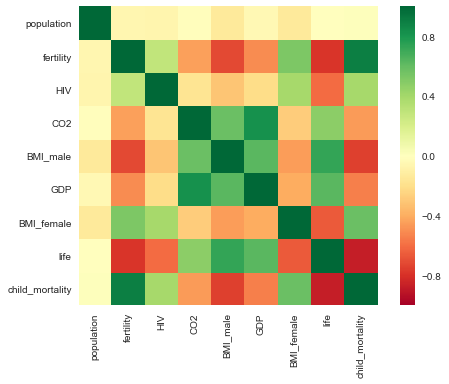

In [4]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

 Cells that are in green show positive correlation, while cells that are in red show negative correlation

In [5]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()
X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)

In [6]:
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

0.6192442167740035


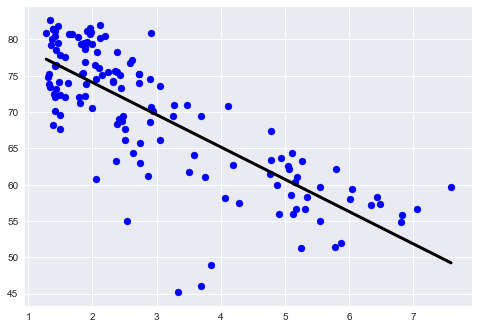

In [7]:
# Plot regression line
plt.scatter(X_fertility, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

### 2 Train/test split for regression

We will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the $R^{2}$ score, we will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [8]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(['life', 'Region'], axis=1).values #Temporarily drop region also, as it has categorical(string) data

y = df['life'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


### 3. Cross Validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.
By default, scikit-learn's cross_val_score() function uses $R^{2}$ as the metric of choice for regression.

In [11]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793451


Cross validation is essential but lets not forget that the more folds we use, the more computationally expensive cross-validation becomes. We test this on 3-fold cross-validation and then 10-fold cross-validation.

In [12]:
print('Cross Validation with 3: {} and with 10: {}'.format(np.mean(cross_val_score(reg, X, y, cv=3)), np.mean(cross_val_score(reg, X, y, cv=10))))

Cross Validation with 3: 0.8718712782622262 and with 10: 0.8436128620131266


In [13]:
%timeit cross_val_score(reg, X, y, cv = 3)

100 loops, best of 3: 4.44 ms per loop


In [14]:
%timeit cross_val_score(reg, X, y, cv = 10)

10 loops, best of 3: 16.7 ms per loop


### Regularized Regression

Lasso Regression can be used for feature selection. using the 'coef_' attribute the unimportaant feature parameters are shrunk to exactly 0 and we get to know the most important feature. We can see from the graph below that child_mortality attribute is the most important attribute for predicting life expectancy.

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


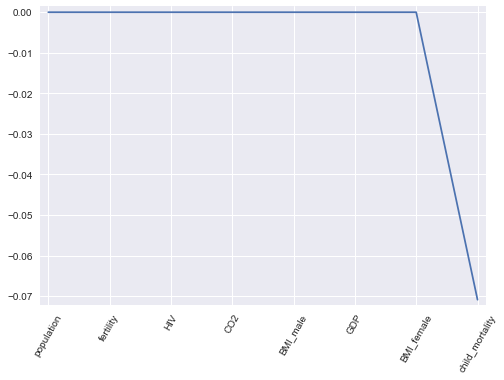

In [15]:
df_columns = df.drop(['life', 'Region'], axis=1).columns
# Import Lasso
from sklearn.linear_model import Lasso


# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [16]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

Lasso is great for feature selection, but when building regression models, Ridge regression should be the first choice. Lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. We now fit ridge regression models over a range of different alphas, and plot cross-validated $R^2$ scores for each.

In [17]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

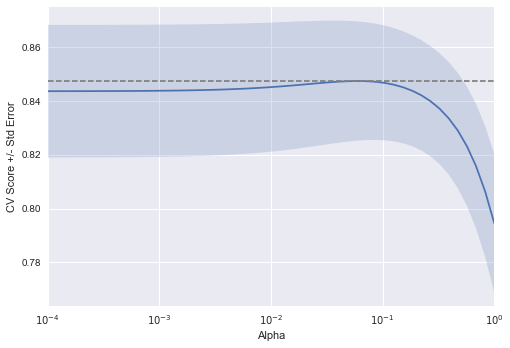

In [18]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)